# Data Cleanup and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
aisles = pd.read_csv('../../data/aisles.csv')
departments = pd.read_csv('../../data/departments.csv')
order_products_prior = pd.read_csv('../../data/order_products__prior.csv')
order_products_train = pd.read_csv('../../data/order_products__train.csv')
orders = pd.read_csv('../../data/orders.csv')
products = pd.read_csv('../../data/products.csv')
order_test = pd.read_csv('../../data/sample_submission.csv')

In [3]:
print("aisles:", aisles.shape)
print("departments:", departments.shape)
print("order_products_prior:", order_products_prior.shape)
print("order_products_train:", order_products_train.shape)
print("orders:", orders.shape)
print("products:", products.shape)
print("order_test:",order_test.shape)

aisles: (134, 2)
departments: (21, 2)
order_products_prior: (32434489, 4)
order_products_train: (1384617, 4)
orders: (3421083, 7)
products: (49688, 4)
order_test: (75000, 2)


## Product Cleanup

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
aisles.aisle.value_counts().sort_values(ascending=False)
aisles[aisles.aisle == 'missing']

,aisle_id,aisle
99,100,missing


While there are no nulls, aisle_id indicates where the aisle is 'missing' or unknown

In [7]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [9]:
departments.value_counts().sort_values(ascending=False)

department_id  department     
1              frozen             1
9              dry goods pasta    1
10             bulk               1
2              other              1
3              bakery             1
4              produce            1
5              alcohol            1
6              international      1
7              beverages          1
8              pets               1
11             personal care      1
19             snacks             1
20             deli               1
12             meat seafood       1
13             pantry             1
14             breakfast          1
15             canned goods       1
16             dairy eggs         1
17             household          1
18             babies             1
21             missing            1
dtype: int64

Again, there are no nulls in the department df but department_id 21 indicates where the department is unknown  

In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
products.product_name = products.product_name.str.replace(' ', '_').str.lower() 

In [12]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [13]:
products.product_id.value_counts().sort_values(ascending=False)

# products_sorted = products.product_name.sort_values()
# product_list =[]
# for i in products_sorted:
#     product_list.append(i)
# print(product_list)

2049     1
96       1
8196     1
10245    1
12294    1
        ..
6141     1
24564    1
49128    1
2015     1
2047     1
Name: product_id, Length: 49688, dtype: int64

In [14]:
aisle_merge= pd.merge(products, aisles, how='left', on="aisle_id")
product_final = pd.merge(aisle_merge, departments, how='left', on='department_id')

product_final
# product_final.isnull().sum()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,chocolate_sandwich_cookies,61,19,cookies cakes,snacks
1,2,all-seasons_salt,104,13,spices seasonings,pantry
2,3,robust_golden_unsweetened_oolong_tea,94,7,tea,beverages
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen meals,frozen
4,5,green_chile_anytime_sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"vodka,_triple_distilled,_twist_of_vanilla",124,5,spirits,alcohol
49684,49685,en_croute_roast_hazelnut_cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,artisan_baguette,112,3,bread,bakery
49686,49687,smartblend_healthy_metabolism_dry_cat_food,41,8,cat food care,pets


In [15]:
product_final.shape
product_final[(product_final.aisle == 'missing') | (product_final.department == 'missing')]

product_final.product_id.value_counts().sort_values(ascending=False)

2049     1
96       1
8196     1
10245    1
12294    1
        ..
6141     1
24564    1
49128    1
2015     1
2047     1
Name: product_id, Length: 49688, dtype: int64

There don't appear to be any missing products names in the table. I joined aisle and department into the products table for aisle/department clarity, and there are 1258 products that fall into this unknown aisle/department category.

## Orders Cleanup

### Missing Data

In [16]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [17]:
order_products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [18]:
order_products_train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

No missing data!

### Table Exploration

In [19]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000
3,2254736,1,prior,4,4,7,29.000
4,431534,1,prior,5,4,15,28.000


In [20]:
orders['num_orders'] = orders.groupby('user_id')['user_id'].transform(len)

In [21]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_orders
0,2539329,1,prior,1,2,8,nan,11
1,2398795,1,prior,2,3,7,15.000,11
2,473747,1,prior,3,3,12,21.000,11
3,2254736,1,prior,4,4,7,29.000,11
4,431534,1,prior,5,4,15,28.000,11


In [22]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_orders
count,3421083.000,3421083.000,3421083.000,3421083.000,3421083.000,3214874.000,3421083.000
mean,1710542.000,102978.208,17.155,2.776,13.452,11.115,33.310
std,987581.740,59533.718,17.733,2.047,4.226,9.207,25.812
min,1.000,1.000,1.000,0.000,0.000,0.000,4.000
25%,855271.500,51394.000,5.000,1.000,10.000,4.000,13.000
50%,1710542.000,102689.000,11.000,3.000,13.000,7.000,26.000
75%,2565812.500,154385.000,23.000,5.000,16.000,15.000,47.000
max,3421083.000,206209.000,100.000,6.000,23.000,30.000,100.000


In [23]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [24]:
order_products_prior.sort_values("order_id")

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434481,3421083,21162,3,0
32434480,3421083,45309,2,0
32434479,3421083,7854,1,0
32434482,3421083,18176,4,1


In [25]:
order_products_train.shape

(1384617, 4)

In [26]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
num_orders                  int64
dtype: object

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   num_orders              int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 208.8+ MB


### Data Explanations 
The dataset provided comes with 3 sets of orders tables- orders_products_prior, order_products_train, and orders.

The <b>orders</b> table describes a time some user purchased a set of products, with 1 order per row. From this table you can determine how many orders per user, time of order (day of week and hour of day), and days between orders. I added a new column num_orders that tells the number of total orders per user. The variable <i>eval_set</i> describes where each order exists across the order tables - prior, train, and test. From this column, it appears each user's last order was taken out and divided into either 'train' or 'test', with all the prior order informations stored in order_products_prior file. 

The <b>orders_products_prior</b> and <b>orders_products_train</b> give us information on the products associated with each order, along with the order in which products were placed into the cart, and whether this product is a re-order(1) or not(0) for this user. 

## Exploratory Analysis

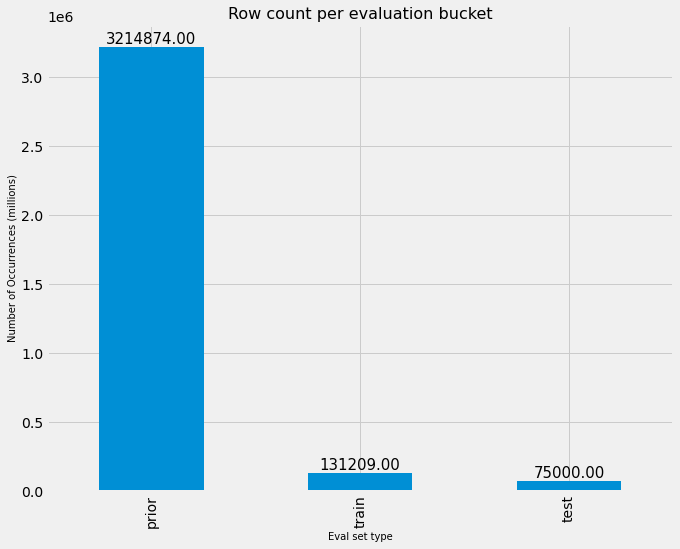

In [28]:
eval_ct = orders.eval_set.value_counts()
eval_plot = eval_ct.plot(kind='bar')

for bar in eval_plot.patches: 
    eval_plot.annotate(format(bar.get_height(), '.2f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 8), 
                       textcoords='offset points') 

plt.ylabel('Number of Occurrences (millions)', fontsize=10)
plt.xlabel('Eval set type', fontsize=10)
plt.title('Row count per evaluation bucket', fontsize=16)
plt.show();

In [29]:
orders.groupby('eval_set').user_id.nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

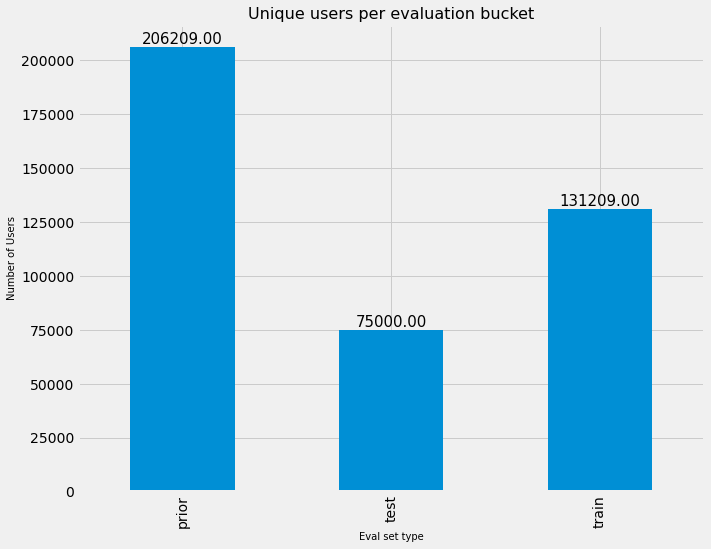

In [30]:
eval_unique = orders.groupby('eval_set').user_id.nunique().plot(kind='bar')
for bar in eval_unique.patches: 
    eval_unique.annotate(format(bar.get_height(), '.2f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 8), 
                       textcoords='offset points') 

plt.ylabel('Number of Users', fontsize=10)
plt.xlabel('Eval set type', fontsize=10)
plt.title('Unique users per evaluation bucket', fontsize=16)
plt.show();

## Orders and Products Analysis

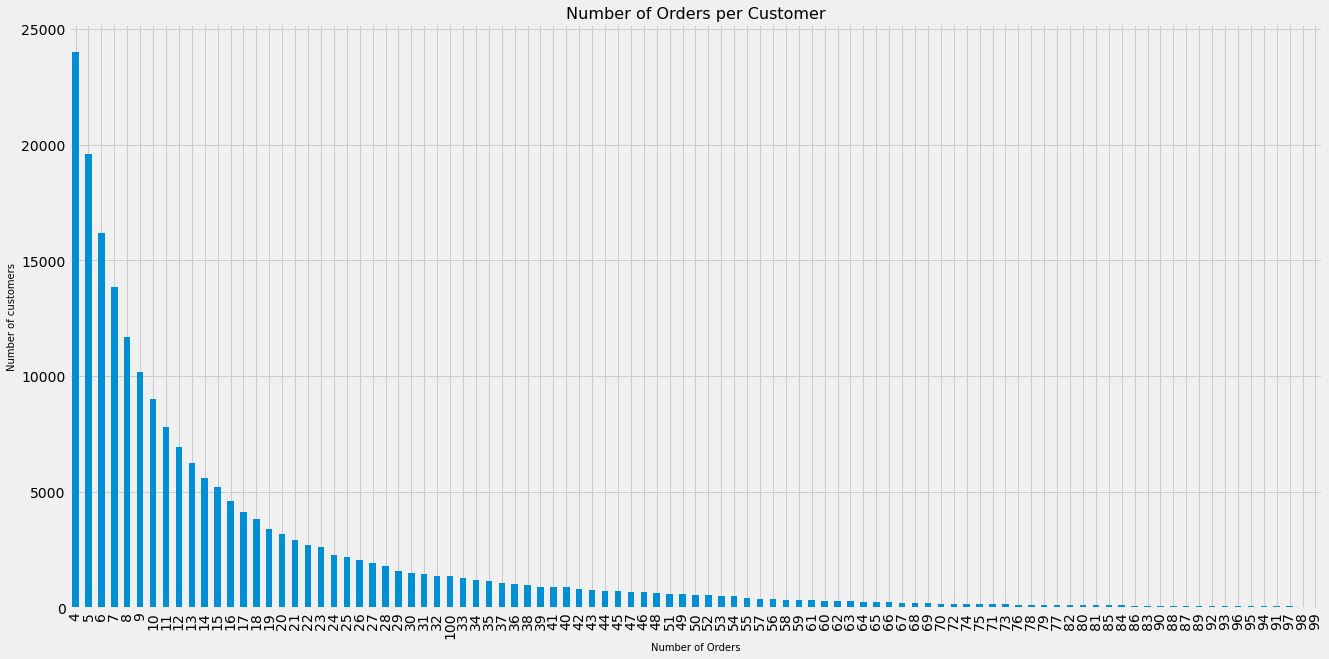

In [31]:
order_vols = orders.groupby('user_id').user_id.agg(['count'])
order_ser = order_vols['count'].value_counts()

plt.figure(figsize=(20,10))
order_ser.plot(kind='bar')
plt.ylabel('Number of customers', fontsize=10)
plt.xlabel('Number of Orders', fontsize=10)
plt.title('Number of Orders per Customer', fontsize=16);


In [32]:
order_vols[order_vols['count'] == 100]
order_vols[(order_vols['count'] < 100) & (order_vols['count'] >= 90) ]

,count
user_id,
516,94
626,95
652,96
1866,98
2307,98
...,...
205139,92
205417,97
205751,96


Every user (in this dataset) makes at least 4 orders and no more than 100. In general, it appears that there are fewer people making a lot of orders. However one outlier is that 1,374 users made 100 orders, while only 616 users made between 90-99 orders. 

In [33]:
# orders.head()
product_final.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,chocolate_sandwich_cookies,61,19,cookies cakes,snacks
1,2,all-seasons_salt,104,13,spices seasonings,pantry
2,3,robust_golden_unsweetened_oolong_tea,94,7,tea,beverages
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen meals,frozen
4,5,green_chile_anytime_sauce,5,13,marinades meat preparation,pantry


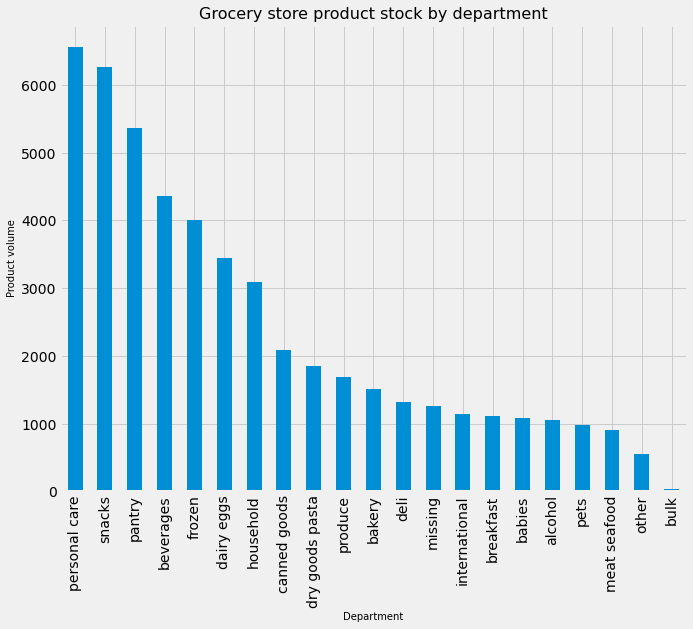

In [34]:
product_final.department.value_counts().plot(kind='bar')
plt.ylabel('Product volume', fontsize=10)
plt.xlabel('Department', fontsize=10)
plt.title('Grocery store product stock by department', fontsize=16)
plt.show();

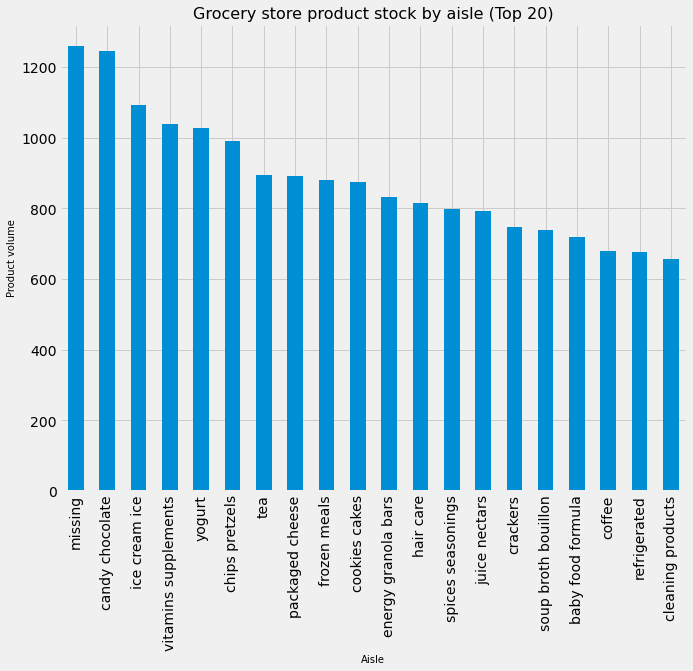

In [35]:
product_final.aisle.value_counts().head(20).plot(kind='bar')
plt.ylabel('Product volume', fontsize=10)
plt.xlabel('Aisle', fontsize=10)
plt.title('Grocery store product stock by aisle (Top 20)', fontsize=16)
plt.show();

<Figure size 864x576 with 0 Axes>

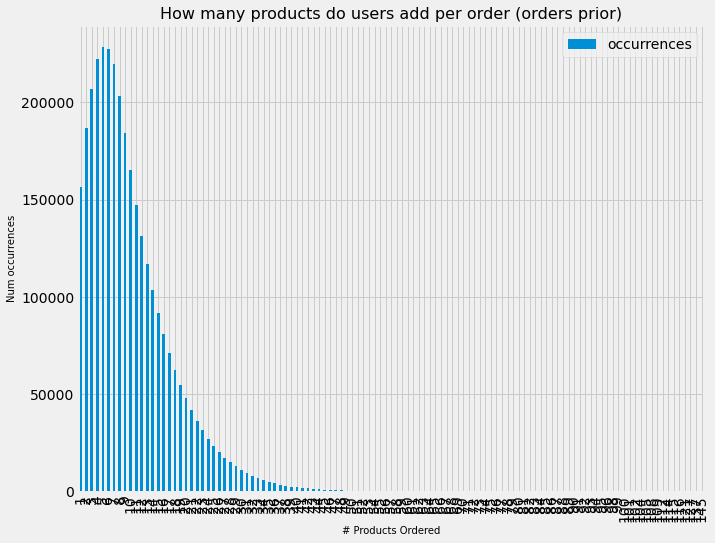

In [36]:
order_vols = order_products_prior.groupby('order_id').product_id.agg(['count'])
order_vols = pd.DataFrame(order_vols.sort_values('count').value_counts())
order_vols.rename(columns={0: "occurrences"}, inplace=True)

plt.figure(figsize=(12,8))
order_vols.reset_index().sort_values('count').plot(kind='bar', x='count', y='occurrences')

plt.ylabel('Num occurrences', fontsize=10)
plt.xlabel('# Products Ordered', fontsize=10)
plt.title('How many products do users add per order (orders prior)', fontsize=16);

<Figure size 864x576 with 0 Axes>

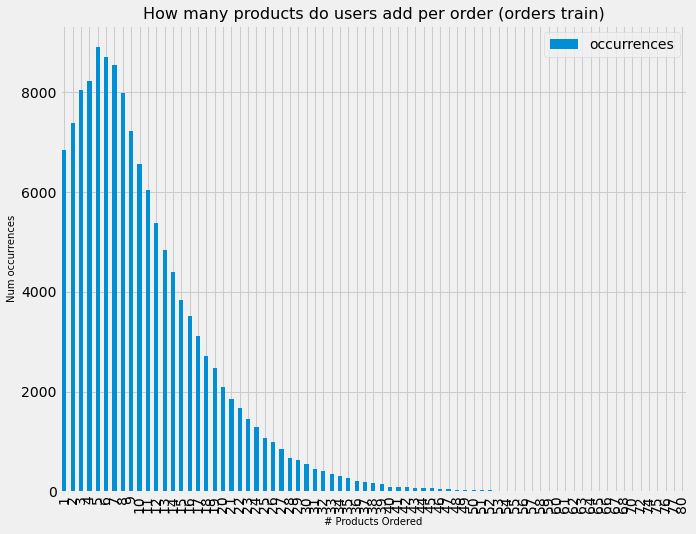

In [37]:
order_vols = order_products_train.groupby('order_id').product_id.agg(['count'])
order_vols = pd.DataFrame(order_vols.sort_values('count').value_counts())
order_vols.rename(columns={0: "occurrences"}, inplace=True)

plt.figure(figsize=(12,8))
order_vols.reset_index().sort_values('count').plot(kind='bar', x='count', y='occurrences')

plt.ylabel('Num occurrences', fontsize=10)
plt.xlabel('# Products Ordered', fontsize=10)
plt.title('How many products do users add per order (orders train)', fontsize=16);

The distributions of # products that users add per order look similar across the prior and train data (both super right-skewed).

In [38]:
order_products_prior_df = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,organic_egg_whites,86,16,eggs,dairy eggs
1,2,28985,2,1,michigan_organic_kale,83,4,fresh vegetables,produce
2,2,9327,3,0,garlic_powder,104,13,spices seasonings,pantry
3,2,45918,4,1,coconut_butter,19,13,oils vinegars,pantry
4,2,30035,5,0,natural_sweetener,17,13,baking ingredients,pantry


In [39]:
order_products_prior_df.product_name.value_counts().reset_index().head(20)

,index,product_name
0,banana,472565
1,bag_of_organic_bananas,379450
2,organic_strawberries,264683
3,organic_baby_spinach,241921
4,organic_hass_avocado,213584
5,organic_avocado,176815
6,large_lemon,152657
7,strawberries,142951
8,limes,140627
9,organic_whole_milk,137905


In [40]:
reordered_prod_prior = order_products_prior_df[order_products_prior_df.reordered==1]
reordered_prod_prior.product_name.value_counts().reset_index().head(20)

,index,product_name
0,banana,398609
1,bag_of_organic_bananas,315913
2,organic_strawberries,205845
3,organic_baby_spinach,186884
4,organic_hass_avocado,170131
5,organic_avocado,134044
6,organic_whole_milk,114510
7,large_lemon,106255
8,organic_raspberries,105409
9,strawberries,99802


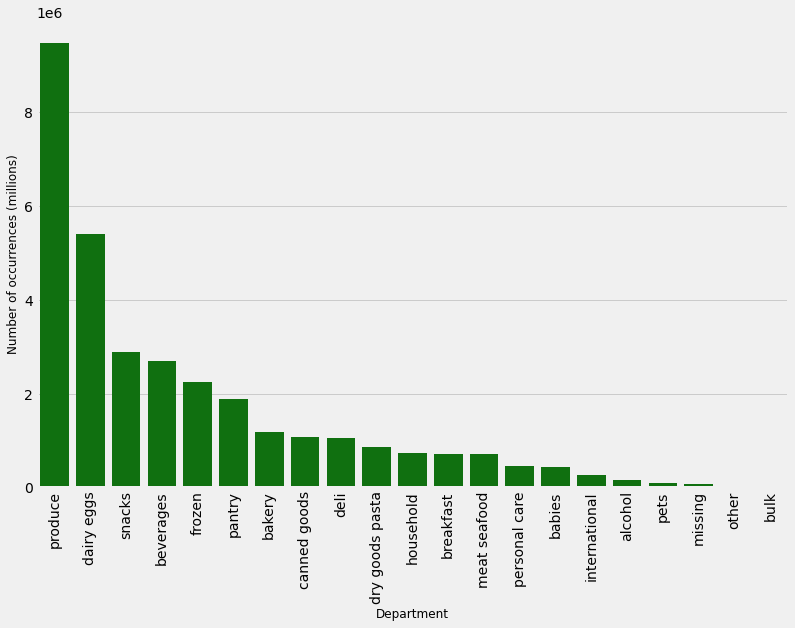

In [41]:
plt.figure(figsize=(12,8))
dpt_ordered = order_products_prior_df['department'].value_counts()
sns.barplot(x=dpt_ordered.index, y=dpt_ordered.values, color = 'g')
plt.ylabel('Number of occurrences (millions)', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical');

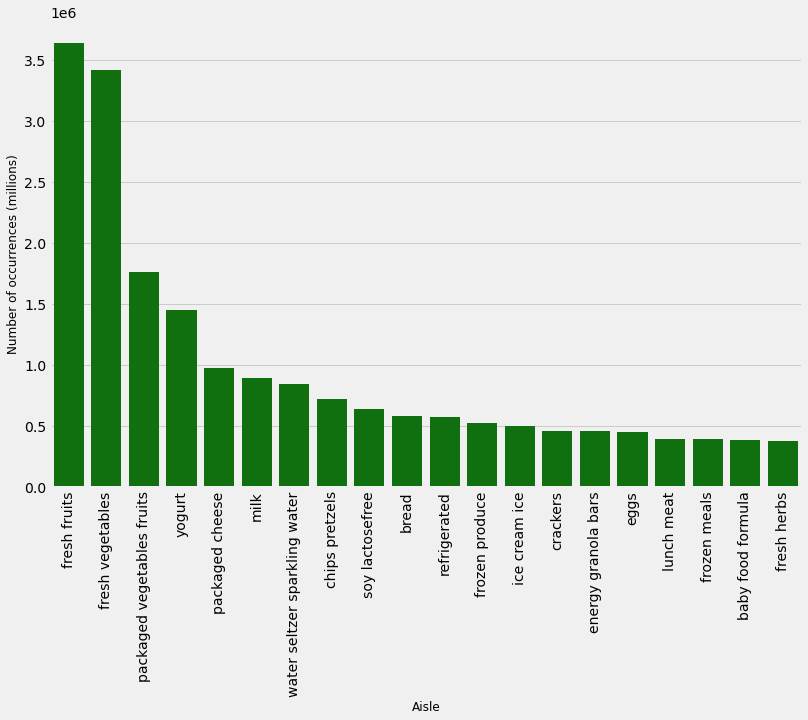

In [42]:
plt.figure(figsize=(12,8))
dpt_ordered = order_products_prior_df['aisle'].value_counts().head(20)
sns.barplot(x=dpt_ordered.index, y=dpt_ordered.values, color = 'g')
plt.ylabel('Number of occurrences (millions)', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical');

One note is that the top products purchased and reordered are things like produce and stock kitchen ingredients, whereas in the earlier breakdowns by aisle and department, most stores are more heavily stocked with snacks, pantry, and frozen goods. 

## Time Analysis

In [43]:
product_ct = order_products_prior.groupby('order_id').product_id.agg(['count']).reset_index()
product_ct.rename(columns={'index': "order_id",'count':'num_products'}, inplace=True)
product_ct

order_with_products_counts = pd.merge(orders, product_ct, on='order_id', how='left')
prior_orders_with_product = order_with_products_counts[order_with_products_counts.eval_set =='prior']

In [44]:
prior_orders_with_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_orders,num_products
0,2539329,1,prior,1,2,8,nan,11,5.000
1,2398795,1,prior,2,3,7,15.000,11,6.000
2,473747,1,prior,3,3,12,21.000,11,5.000
3,2254736,1,prior,4,4,7,29.000,11,5.000
4,431534,1,prior,5,4,15,28.000,11,8.000


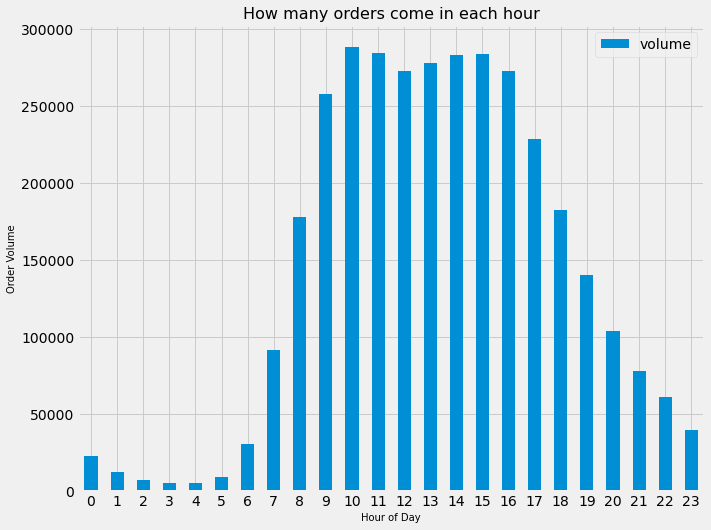

In [45]:
grouped = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
grouped = grouped.order_hour_of_day.value_counts().reset_index()
grouped.rename(columns={"index": "hour_of_day","order_hour_of_day":"volume"}, inplace=True)
grouped.sort_values('hour_of_day').plot(kind='bar', x='hour_of_day',y='volume')

plt.ylabel('Order Volume', fontsize=10)
plt.xlabel('Hour of Day', fontsize=10)
plt.title('How many orders come in each hour', fontsize=16)
plt.xticks(rotation='horizontal');

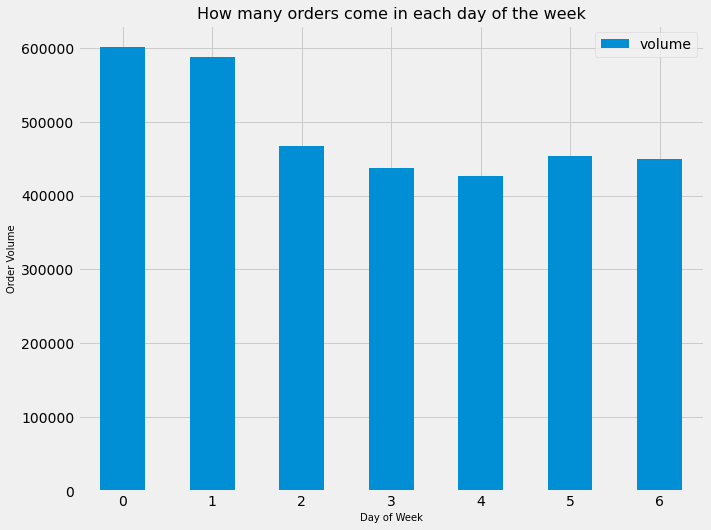

In [46]:
grouped = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts().reset_index()
grouped.rename(columns={"index": "dow","order_dow":"volume"}, inplace=True)
grouped.sort_values('dow').plot(kind='bar', x='dow',y='volume')

plt.ylabel('Order Volume', fontsize=10)
plt.xlabel('Day of Week', fontsize=10)
plt.title('How many orders come in each day of the week', fontsize=16)
plt.xticks(rotation='horizontal');

It is unclear what day '0' means. For the purpose of interpretation, I will assume that Day 0 and 1 represent the weekend. Most shopping occurs between 9 AM and 5 PM. 

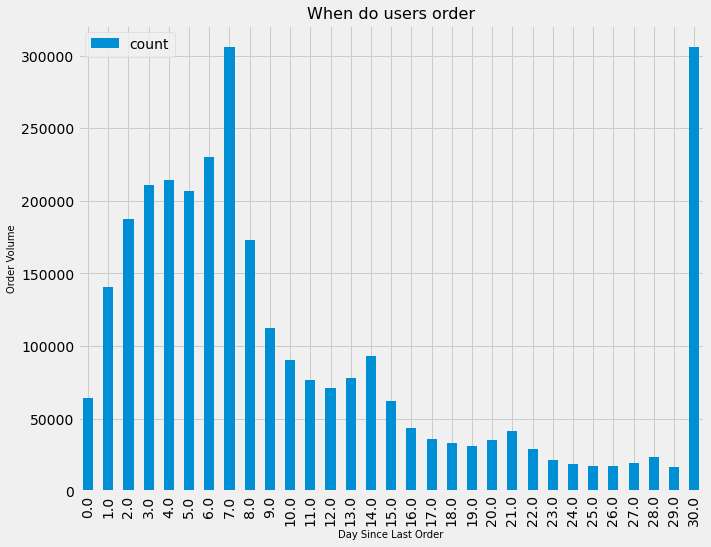

In [47]:
days_since_df = prior_orders_with_product.days_since_prior_order.value_counts().reset_index()
days_since_df.rename(columns={"index":"days","days_since_prior_order":"count"}, inplace=True)
days_since_df.sort_values('days').plot(kind='bar',x='days',y='count')
plt.ylabel('Order Volume', fontsize=10)
plt.xlabel('Day Since Last Order', fontsize=10)
plt.title('When do users order', fontsize=16)
plt.xticks(rotation='vertical');

Most reorders occur after 7 and 30 days. 

## Reorder Analysis

In [48]:
prior_orders_with_product.head()
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


% of products that are re-orders in an order
1   58.970
0   41.030
Name: reordered, dtype: float64


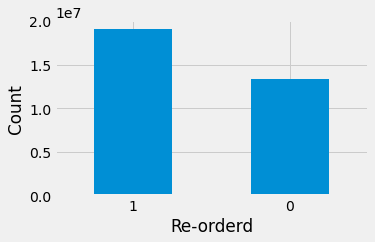

In [49]:
print('% of products that are re-orders in an order')
print(100. * order_products_prior.reordered.value_counts() / len(order_products_prior.reordered));

plt.figure(figsize=(5,3))
order_products_prior.reordered.value_counts().plot(kind='bar')
plt.xlabel('Re-orderd')
plt.ylabel('Count')
plt.xticks(rotation='horizontal');

add_to_cart ranking vs reorder 

<AxesSubplot:xlabel='add_to_cart_order'>

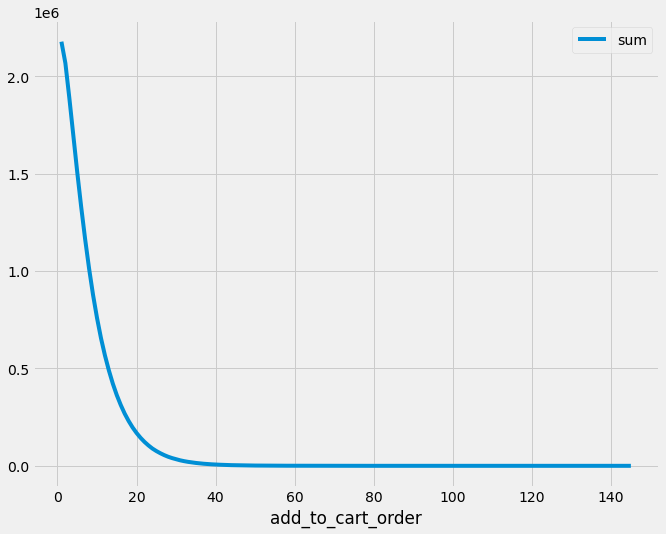

In [50]:
order_products_prior.groupby('add_to_cart_order')['reordered'].agg(['sum']).plot(kind='line')

This graph shows that usually the first 20 products placed into the cart are ones that are reordered.

In [51]:
# products[products.product_name =='Banana']
order_products_prior[order_products_prior.product_id == 24852].groupby('product_id').reordered.value_counts(normalize=True)

product_id  reordered
24852       1           0.844
            0           0.156
Name: reordered, dtype: float64

In [52]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [53]:
reorder_rate_product = (order_products_prior_df.groupby('product_name').reordered
                        .value_counts(normalize=True).reset_index(name='perc_reordered'))

In [54]:
reorder_rate_product = reorder_rate_product[reorder_rate_product.reordered == 1]
reorder_rate_product

reorder_rate_product[reorder_rate_product.perc_reordered >= 0.84]

,product_name,reordered,perc_reordered
2378,a.r._milk_based_infant_formula_for_spit‑up_powder,1,0.859
3137,alimentum_infant_formula,1,0.847
4037,almond_orgeat_syrup,1,0.889
4233,amazake_almond_shake,1,0.880
6380,baci_dark_chocolate_with_whole_and_chopped_haz...,1,0.844
...,...,...,...
90955,very_rare_blended__scotch_whisky,1,0.878
91401,vodka_80_proof,1,0.857
91415,vodka_vanilia,1,0.848
93087,whole_milk_bulgarian_yogurt,1,0.848


In [55]:
order_vol_product = order_products_prior_df.product_name.value_counts().reset_index()
order_vol_product.rename(columns={"index":"product_name","product_name":"product_order_vol"},inplace=True)
order_vol_product
ro_merged = pd.merge(reorder_rate_product, order_vol_product, how='left', on='product_name')

In [56]:
thresh = ro_merged[ro_merged.perc_reordered >= 0.80].sort_values('product_order_vol', ascending=False)
thresh
# thresh.plot(kind='bar',x='product_name',y='')

,product_name,reordered,perc_reordered,product_order_vol
3229,banana,1,0.844,472565
3041,bag_of_organic_bananas,1,0.833,379450
29562,organic_whole_milk,1,0.830,137905
38657,spring_water,1,0.812,56087
28623,organic_reduced_fat_2%_milk,1,0.806,47839
...,...,...,...,...
39304,strawman_farmhouse_hard_cider,1,0.833,12
18475,hot_&_fit_mayan_blend_cereal,1,0.833,12
39773,superfruit_mix_jelly_beans,1,0.818,11
5695,california_french_dressing,1,0.800,5


## Save Data to CSV

In [119]:
order_products_prior_df.to_csv('../../data/order_products_prior_df.csv')
prior_orders_with_product.to_csv('../../data/prior_orders_with_product.csv')